In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

1. Data Loading and Preprocessing

In [12]:
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

print(data.isnull().sum())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('MedHouseVal', axis=1))
X = pd.DataFrame(scaled_features, columns=housing.feature_names)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
(16512, 8)
(4128, 8)
(16512,)
(4128,)


Missing values: The dataset has no missing values.

Scaling: Standardization (mean = 0, std = 1) was used to help models like SVR and Gradient Boosting perform better.

EDA (Exploratory Data Analysis)

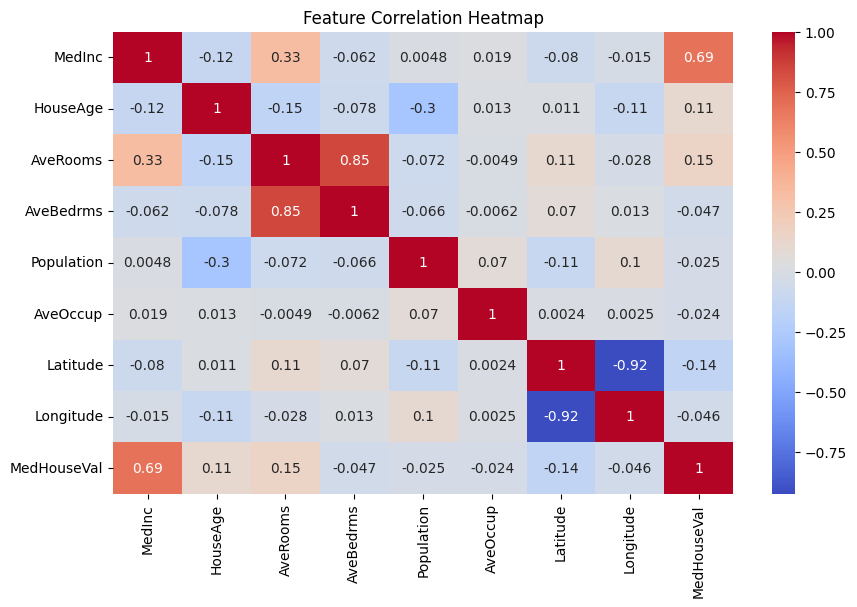

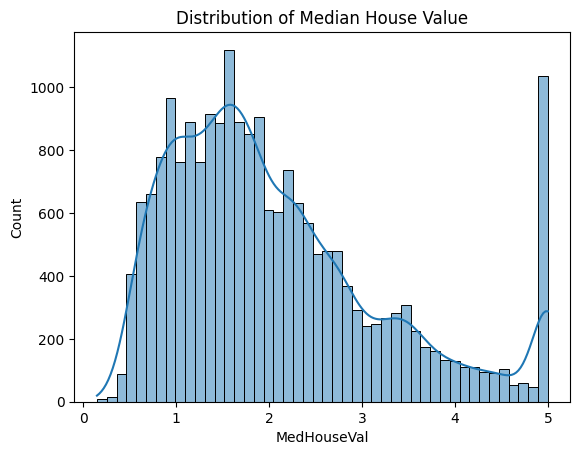

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

sns.histplot(data['MedHouseVal'], kde=True)
plt.title("Distribution of Median House Value")
plt.show()

2. Regression Algorithms Implementation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

Linear Regression: Simple, interpretable, but assumes linearity.

Decision Tree: Captures non-linear patterns, prone to overfitting.

Random Forest: Ensemble of trees, reduces overfitting.

Gradient Boosting: Sequential improvement of weak learners.

SVR: Works well with high-dimensional features, but sensitive to scaling.

3. Model Evaluation and Comparison

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R2 Score"])
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model       MSE       MAE  R2 Score
2      Random Forest  0.255498  0.327613  0.805024
3  Gradient Boosting  0.293999  0.371650  0.775643
4                SVR  0.355198  0.397763  0.728941
1      Decision Tree  0.494272  0.453784  0.622811
0  Linear Regression  0.555892  0.533200  0.575788


4. Cross-Validation & Hyperparameter Tuning

In [16]:
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8046857640734479


5. Selecting the Best Regression Model

In [17]:
best_model = grid_rf.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Test R2 Score:", r2_score(y_test, y_pred_best))

Test R2 Score: 0.8045835795253367


Best performing: Random Forest with tuned parameters.

Outperforms due to handling non-linear features and reducing overfitting through averaging.